In [6]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

Load data

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Prepare data

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Construct model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Train the model

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 21s 22ms/step - loss: 0.1823 - accuracy: 0.9430
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0341 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0255 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0194 - accuracy: 0.9941


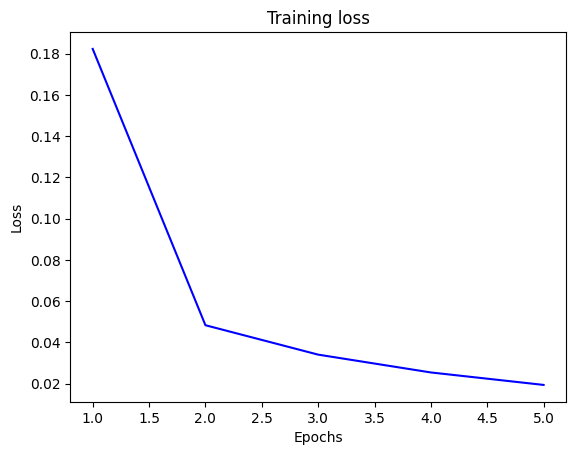

In [25]:
import matplotlib.pyplot as plt

history_dic = history.history
loss_value = history_dic['loss']

epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [12]:
result = model.evaluate(test_images, test_labels)
print(result)

313/313 [==============================] - 2s 5ms/step - loss: 0.0282 - accuracy: 0.9917
[0.02820848673582077, 0.9916999936103821]


Using custom image to predic

In [24]:
from PIL import Image
image = Image.open('5.jpg')
image_gray = image.convert('L')
image_gray = image_gray.resize((28, 28))
image_array_gray = np.array(image_gray)
image_array_gray = np.expand_dims(image_array_gray, axis=-1)
image_array_gray = image_array_gray / 255.0
image_array = np.expand_dims(image_array_gray, axis=0)
prediction = model.predict(image_array)
print(np.argmax(prediction))

1/1 [==============================] - 0s 15ms/step
3
